In [5]:
import pickle
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('dataset/Default Dataset Voltage to Capacity.csv')

In [22]:
df['Voltage'] = df['Voltage'] * 16

In [34]:
df

,Capacity,Voltage
0,99.941107,50.332996
1,99.941107,49.942818
2,99.941107,49.406323
3,99.941107,49.113690
4,99.823322,48.723570
...,...,...
238,-4.004711,12.390128
239,-4.181390,11.658630
240,-4.240283,11.122165
241,-4.240283,10.780759


<Axes: xlabel='Voltage', ylabel='Capacity'>

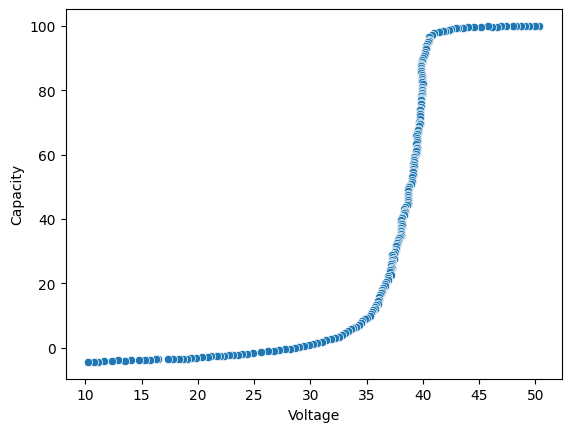

In [24]:
sns.scatterplot(x=df['Voltage'], y=df['Capacity'])

In [25]:
X = df[['Voltage']]
y = df['Capacity']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = model_rf.predict(X_test)

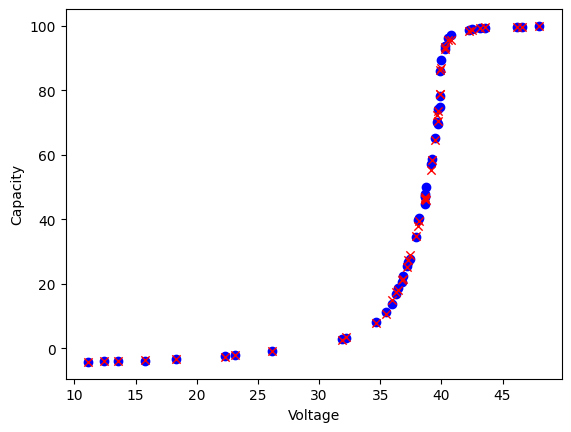

In [30]:
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red', marker='x', linewidths=1)
plt.xlabel('Voltage')
plt.ylabel('Capacity')
plt.show()

In [31]:
accuracy = model_rf.score(X_test, y_test)
print(f'Akurasi model: {accuracy}')

Akurasi model: 0.9989437240860469


In [32]:
pklname = 'voltage_to_capacity.pkl'

with open(pklname, 'wb') as file:
    pickle.dump(model_rf, file)

In [33]:
new_data = pd.DataFrame({'Voltage': [45.3]})
with open(pklname, 'rb') as file:
    model = pickle.load(file)


pred_capacity = model.predict(new_data)
pred_capacity[0]

99.74204946996457